### 0. 데이터 준비

In [1]:
#!pip install --upgrade --force-reinstall matplotlib

In [2]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt

In [3]:
# 1. 데이터 로드
df = pd.read_csv('./preprocessing_final_v5.csv')
df_origin = df

In [4]:
df.shape

(296578, 12)

In [5]:
df_v1 = df[df['위해부위'] != '(부위)해당없음']
df_v2 = df_v1[df_v1['위해증상'] != '해당없음']

In [6]:
print(df_v2['위해증상'].str.contains('해당없음').sum())
print(df_v2['위해부위'].str.contains('(부위)해당없음').sum())

0
0


/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_62636/1051859736.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_v2['위해부위'].str.contains('(부위)해당없음').sum())


In [7]:
df_q = df_v2[['성별', '범주형 나이', '위해원인', '위해증상', '위해부위', '발생장소', '품목대분류']]
df_q['품목대분류'].value_counts()

품목대분류
건축/인테리어 자재 및 작업공구    38667
가공식품                 31535
의약(외)품 및 의료용구        23841
가구 및 가구설비            23419
스포츠 및 취미용품           17771
완구 및 게임용품            15263
건물 시설 및 서비스           9856
자동차 및 관련 용품           7638
가전제품 및 정보통신기기         5611
주방기기 및 용품             5552
축산/수산물 식품             5025
화장품 및 화장용품            4389
식물 식품                 2956
도서/음반 및 문구용품          2713
생활용품                  2441
의류/신발/가방/보석/시계 등      1735
농임어업용 기계 및 관련용품       1732
연료 및 전지                890
조명기구 및 전기 부품/용품        595
기타 장비 및 제품             529
애완 동식물 및 용품            316
화재 안전 및 보안 장비          298
Name: count, dtype: int64

In [8]:
df_all = df_v2[['성별', '범주형 나이', '위해원인', '위해증상', '위해부위', '발생장소']]
df_all.shape

(202772, 6)

In [9]:
df_all.head(10)

,성별,범주형 나이,위해원인,위해증상,위해부위,발생장소
0,남자,55-59,부패·변질,가려움,(부위)전신 손상,주택 - 주방
1,여자,35-39,부패·변질,소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 주방
2,여자,0-4,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 주방
4,여자,50-54,식품 섭취에 의한 위험 및 위해,두드러기,"(부위)팔(아래부분, 팔꿈치 및 손목 제외)",주택 - 거실
5,여자,0-4,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 주방
7,여자,55-59,이물질(돌),파쇄(부서짐),(부위)치아,"기타 - 상세불명의 장소, 부대·부속시설"
11,여자,55-59,이물질(기타),파쇄(부서짐),(부위)치아,"기타 - 상세불명의 장소, 부대·부속시설"
12,여자,45-49,이물질(기타),소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 주방
20,남자,20-24,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)전신 손상,주택 - 침실/방
22,남자,5-9,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,"기타 - 상세불명의 장소, 부대·부속시설"


In [10]:
print(df_all['위해증상'].str.contains('해당없음').sum())
print(df_all['위해부위'].str.contains('(부위)해당없음').sum())

0
0


/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_62636/787711670.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_all['위해부위'].str.contains('(부위)해당없음').sum())


## 1. 빈발항목 분석

In [11]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_all.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [12]:
df_encoded.shape

(202772, 352)

In [13]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

남자                           101485
여자                           100726
미끄러짐·넘어짐                      60524
0-4                           46083
열상(찢어짐)                       45271
식품 섭취에 의한 위험 및 위해             36515
(부위)신체내부-소화계통(식도,위장,대장 등)     32901
주택 - 침실/방                     32809
기타 - 시설목적공간                   30580
(부위)머리 및 뇌(뇌막)                29050
dtype: int64

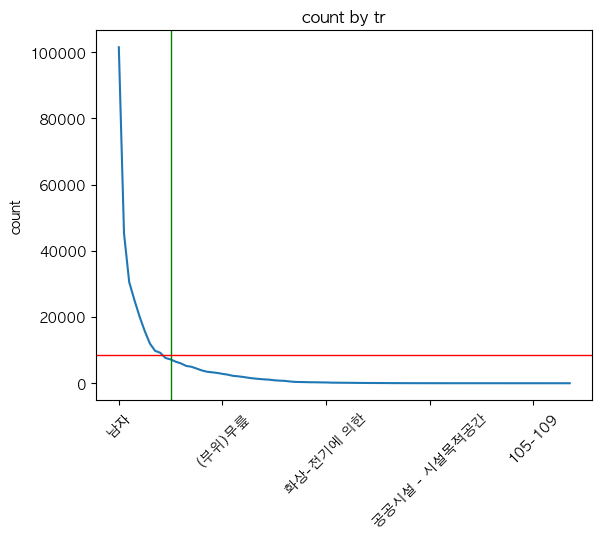

In [14]:
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.axvline(x=10, color='g', linewidth=1)
plt.axhline(y=8674, color='r', linewidth=1)

plt.show()
# (202772, 352)
# 10%(35.2/352)의 항목(35항목(내림처리)) 4.3%(8674/202772*100) 발생 -> min_support=0.08
# 컬럼을 기준으로 10%는 몇 개까지인지? -> 10%에 위치하는 마지막 컬럼의 빈도수 확인 -> 앞에서 구한 빈도수가 전체 행의 개수에서 몇 a% 차지하는지 -> 결과적으로 이 a%를 최소 지지도로 설정

# 최소지지도 0.1(10%),

In [15]:
sort_sum = pd.DataFrame(df_encoded.sum().sort_values(ascending=False)).iloc[:35].T

sort_sum = sort_sum.astype(float)

new_row = {}
for column in sort_sum.columns:
    new_row[column] = sort_sum.iloc[0][column] / 202772

pd.concat([sort_sum, pd.DataFrame(new_row, index=[0])], ignore_index=True)

,남자,여자,미끄러짐·넘어짐,0-4,열상(찢어짐),식품 섭취에 의한 위험 및 위해,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 침실/방,기타 - 시설목적공간,(부위)머리 및 뇌(뇌막),...,10-14,55-59,체내 위험 이물질,20-24,(부위)눈 및 눈주변(눈썹 및 눈꺼풀),예리함·마감처리 불량,부딪힘,60-64,45-49,30-34
0,101485.000000,100726.000000,60524.000000,46083.000000,45271.000000,36515.000000,32901.000000,32809.000000,30580.00000,29050.000000,...,10787.000000,10187.000000,10150.000000,9788.000000,9724.000000,9246.000000,9209.000000,9195.000000,9152.000000,8674.000000
1,0.500488,0.496745,0.298483,0.227265,0.223261,0.180079,0.162256,0.161802,0.15081,0.143264,...,0.053198,0.050239,0.050056,0.048271,0.047955,0.045598,0.045416,0.045346,0.045134,0.042777


- (원인) 미끄러짐 + 넘어짐 자주 발생

- (증상) 열상(찢어짐) 존재 : 미끄러짐 + 넘어짐 사고가 많다는 점을 감안했을 때 예측가능한 결과임

- (원인) 식품 섭취, (부위) 소화계통이 거의 비슷한 횟수로 나타나는 것도 예측가능한 결과임

- 제대로된 활동이나 생각이 불가한 0-4세에서 사고가 다발하는 것으로 보아, 부모의 부주의로 일어날 수 있는 사고에 대한 규칙이 존재할지에 주목해보는 것도 좋은 접근이 될 것 같음

- 0-4세에서 거의 대부분의 사고가 자주 발생하는 것인지에 대한 생각도 해볼 필요 있음

In [16]:
min_support=0.1
max_support=0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

frequent_itemsets

,support,itemsets
0,0.500488,(남자)
1,0.126758,(주택 - 주방 )
2,0.496745,(여자)
3,0.162256,"((부위)신체내부-소화계통(식도,위장,대장 등))"
4,0.114192,(소화기계통 장기손상 및 통증)
5,0.227265,(0-4)
6,0.180079,(식품 섭취에 의한 위험 및 위해)
7,0.128997,(주택 - 거실 )
8,0.161802,(주택 - 침실/방 )
9,0.150810,(기타 - 시설목적공간)


In [17]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
0,0.500488,(남자)
2,0.496745,(여자)
13,0.298483,(미끄러짐·넘어짐)
5,0.227265,(0-4)
11,0.223261,(열상(찢어짐))
6,0.180079,(식품 섭취에 의한 위험 및 위해)
3,0.162256,"((부위)신체내부-소화계통(식도,위장,대장 등))"
8,0.161802,(주택 - 침실/방 )
24,0.161230,"(미끄러짐·넘어짐, 남자)"
9,0.150810,(기타 - 시설목적공간)


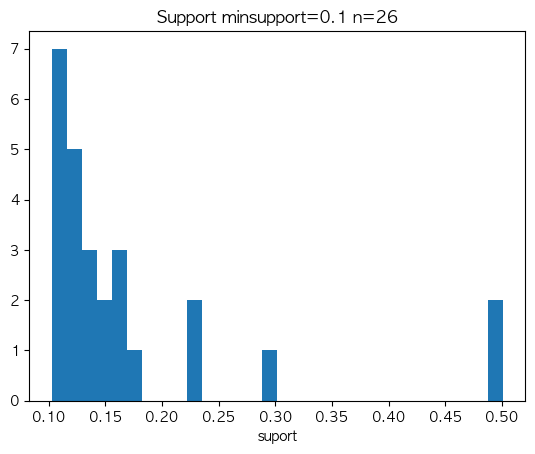

In [18]:
frequent_itemsets.hist('support', grid=False, bins=30)
plt.title(f'Support minsupport={min_support} n={frequent_itemsets.shape[0]}')
plt.xlabel('suport')
plt.show()

#### [주요 빈발 집합 분석]
- 남자: 50.0% 여자: 49.7%로 여자와 남자 거의 비슷한 빈도로 등장함
- 미끄러짐+넘어짐은 29.8%로 발생, 성별에 비해 현저히 빈도수가 낮은 것을 확인할 수 있음
- 이후 부터는 작은 간격으로 빈도수 줄어듦

(예측 가능)
- (원인)식품 섭취 18.0%, (부위)소화계통 16.2% 로 거의 비슷한 빈도
- (미끄러짐+넘어짐,남자) 16.1%, (남자, 열상(찢어짐)) 13.9%, (여자, 미끄러짐+넘어짐) 13.7% 단일 빈도가 높은 미끄러짐+넘어짐과 열상은 다른 것과 결합해도 다소 높은 빈도로 발생
- 아래로 갈수록 "식품섭취"로 발생할 수 있는 것들에 대한 빈발집합 다수 보임


#### [전체적인 경향성]
- 품목대분류 (개수) : 건축/인테리어 자재 및 작업공구 (38667), 가공식품 (31535)
- "타박상 관련"(미끄러짐+넘어짐, 열상(찢어짐), 타박상 등) 위해정보 다수 보임
- "식품섭취 관련"(식품 섭취, 소화계통, 주택-주방, 장기손상 및 통증 등) 위해정보 다수 보임
- 절대량이 우세한 품목대분류의 정보가 전체 분석에 영향을 끼친 것으로 해석됨

In [19]:
# freq_its= 2 생성
# itemsets의 항목개수를 갖는 length 컬럼 추가

frequent_itemsets['length'] = (
    frequent_itemsets['itemsets'].apply(lambda x : len(x))
)

frequent_itemsets.head()

,support,itemsets,length
0,0.500488,(남자),1
1,0.126758,(주택 - 주방 ),1
2,0.496745,(여자),1
3,0.162256,"((부위)신체내부-소화계통(식도,위장,대장 등))",1
4,0.114192,(소화기계통 장기손상 및 통증),1


In [20]:
# 단일항목이 아닌 2건 이상의 항목을 갖는 항목집합을 추출
freq_its_2 = frequent_itemsets[frequent_itemsets.length >= 2 ]
freq_its_2.head()

,support,itemsets,length
16,0.128938,"((부위)신체내부-소화계통(식도,위장,대장 등), 식품 섭취에 의한 위험 및 위해)",2
17,0.114015,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등))",2
18,0.103683,"(소화기계통 장기손상 및 통증, 식품 섭취에 의한 위험 및 위해)",2
19,0.103599,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등), 식...",3
20,0.131700,"(0-4, 남자)",2


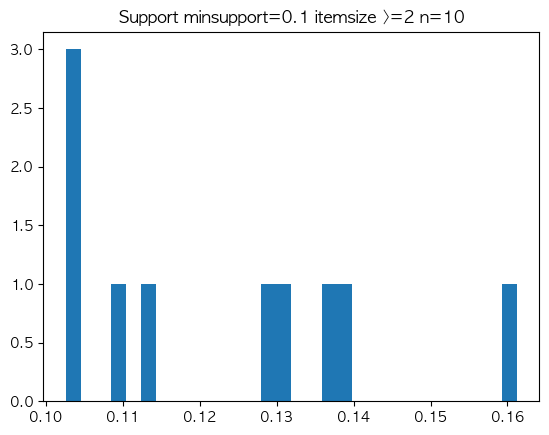

In [21]:
frequent_itemsets['length'] = frequent_itemsets.itemsets.apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets.length >=2].support.hist(grid=False, bins=30)
plt.title(f'Support minsupport={min_support} itemsize >=2 n={frequent_itemsets.length.ge(2).sum()}')
plt.show();

In [22]:
freq_its_2[freq_its_2.support >= 0.13].sort_values(by='support', ascending=False)

,support,itemsets,length
24,0.161230,"(미끄러짐·넘어짐, 남자)",2
22,0.138821,"(남자, 열상(찢어짐))",2
25,0.137203,"(미끄러짐·넘어짐, 여자)",2
20,0.131700,"(0-4, 남자)",2


#### [현재 데이터에서 높은 순에 속하는 0.13 이상만 찾아봄]

- (미끄러짐+넘어짐, 남자), (여자, 미끄러짐+넘어짐)의 경우 빈번히 발생. 관련 분석이 **[품목대분류]건축/인테리어 자재 및 작업공구**의 영향으로 보임.
- (남자, 열상(찢어짐))에 대한 분석도 마찬가지.
- (0-4,남자)의 경우 확인 필요한 집합.

#### [종합 ]
- 남자의 빈도가 더 높긴 하나, 성별에 관계없이 미끄러지는 사고가 더 빈번하게 발생함.
- 열상(찢어짐) 부상은 미끄러짐.넘어짐 사고로 인해 생기는 부상으로 보임.
- (0-4,남자)의 경우 어떤 경위로 발생하는지 [품목대분류] 분석에서 찾아낼 필요가 있어보임.

----

#### 그냥 지지도가 비교적 중간/ 낮은 경우도 분석 진행해봄

In [23]:
freq_its_2[freq_its_2.support.between(0.10,0.12)].sort_values(by='support', ascending=False)

,support,itemsets,length
17,0.114015,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등))",2
23,0.108901,"(미끄러짐·넘어짐, 열상(찢어짐))",2
18,0.103683,"(소화기계통 장기손상 및 통증, 식품 섭취에 의한 위험 및 위해)",2
19,0.103599,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등), 식...",3
21,0.102633,"(여자, 식품 섭취에 의한 위험 및 위해)",2


#### [ 현재 데이터에서 0.10~ 0.12에 속하는 범위만 찾아봄]
- "식품섭취"에 관한 규칙들이 몇몇 드러남. 이는 예측 가능한 정보 (앞서 확인)

## 2. 연관규칙 분석

In [24]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,"(소화기계통 장기손상 및 통증, 식품 섭취에 의한 위험 및 위해)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.103683,0.162256,0.103599,0.999191,6.158112,0.086776,1036.042772,0.934505
2,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.114192,0.162256,0.114015,0.998445,6.153513,0.095486,538.832203,0.945455
6,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등))",(식품 섭취에 의한 위험 및 위해),0.114015,0.180079,0.103599,0.908647,5.045819,0.083067,8.975261,0.904999
4,(소화기계통 장기손상 및 통증),(식품 섭취에 의한 위험 및 위해),0.114192,0.180079,0.103683,0.907968,5.042051,0.083119,8.909089,0.905014
9,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등), 식품 섭취에 의한 위험 및 위해)",0.114192,0.128938,0.103599,0.907234,7.036207,0.088875,9.389871,0.968470
8,"((부위)신체내부-소화계통(식도,위장,대장 등), 식품 섭취에 의한 위험 및 위해)",(소화기계통 장기손상 및 통증),0.128938,0.114192,0.103599,0.803481,7.036207,0.088875,4.507482,0.984864
0,"((부위)신체내부-소화계통(식도,위장,대장 등))",(식품 섭취에 의한 위험 및 위해),0.162256,0.180079,0.128938,0.794657,4.412820,0.099719,3.992927,0.923179
1,(식품 섭취에 의한 위험 및 위해),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.180079,0.162256,0.128938,0.716007,4.412820,0.099719,2.949876,0.943247
3,"((부위)신체내부-소화계통(식도,위장,대장 등))",(소화기계통 장기손상 및 통증),0.162256,0.114192,0.114015,0.702684,6.153513,0.095486,2.979346,0.999698
10,"((부위)신체내부-소화계통(식도,위장,대장 등))","(소화기계통 장기손상 및 통증, 식품 섭취에 의한 위험 및 위해)",0.162256,0.103683,0.103599,0.638491,6.158112,0.086776,2.479378,0.999843


In [25]:
rules_conf.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.165332,0.232152,0.115578,0.739953,4.520243,0.071509,101.749838,0.759616
std,0.052550,0.161590,0.017431,0.163417,2.156347,0.032814,282.653946,0.352510
min,0.103683,0.103683,0.102633,0.540166,1.079278,0.011843,1.086287,0.104708
25%,0.114192,0.114192,0.103599,0.578564,3.620206,0.069071,1.894780,0.741539
50%,0.162256,0.162256,0.103683,0.709345,5.043935,0.084948,2.964611,0.938876
75%,0.180079,0.259246,0.128938,0.907417,6.154663,0.090528,8.925632,0.977783
max,0.298483,0.500488,0.161230,0.999191,7.036207,0.099719,1036.042772,0.999843


----

### 상위 규칙 분석

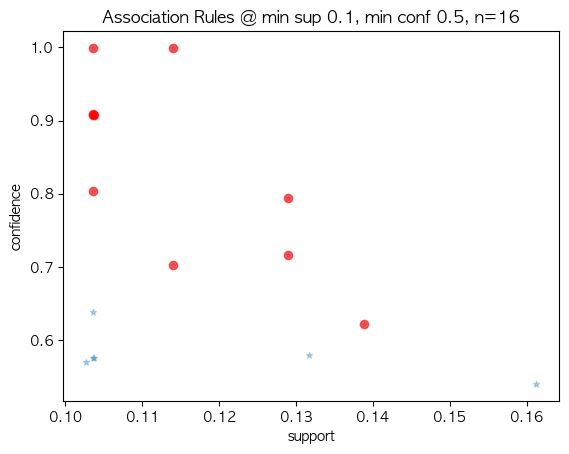

In [26]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 10개의 규칙 추출 ( 15개 밖에 없어서 )
top_10_rules = rules_conf.nlargest(10, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.3, marker='*')
plt.scatter(top_10_rules['support'], top_10_rules['confidence'], color='red', alpha=0.6, marker='o', label='Top 5 Combined Value Rules')

plt.xlabel('support')
plt.ylabel('confidence')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

In [27]:
rules_conf.sort_values(by='combined_value', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
2,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.114192,0.162256,0.114015,0.998445,6.153513,0.095486,538.832203,0.945455,1.112460
7,"(소화기계통 장기손상 및 통증, 식품 섭취에 의한 위험 및 위해)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.103683,0.162256,0.103599,0.999191,6.158112,0.086776,1036.042772,0.934505,1.102791
6,"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등))",(식품 섭취에 의한 위험 및 위해),0.114015,0.180079,0.103599,0.908647,5.045819,0.083067,8.975261,0.904999,1.012246
4,(소화기계통 장기손상 및 통증),(식품 섭취에 의한 위험 및 위해),0.114192,0.180079,0.103683,0.907968,5.042051,0.083119,8.909089,0.905014,1.011651
9,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등), 식품 섭취에 의한 위험 및 위해)",0.114192,0.128938,0.103599,0.907234,7.036207,0.088875,9.389871,0.968470,1.010833
0,"((부위)신체내부-소화계통(식도,위장,대장 등))",(식품 섭취에 의한 위험 및 위해),0.162256,0.180079,0.128938,0.794657,4.412820,0.099719,3.992927,0.923179,0.923595
8,"((부위)신체내부-소화계통(식도,위장,대장 등), 식품 섭취에 의한 위험 및 위해)",(소화기계통 장기손상 및 통증),0.128938,0.114192,0.103599,0.803481,7.036207,0.088875,4.507482,0.984864,0.907080
1,(식품 섭취에 의한 위험 및 위해),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.180079,0.162256,0.128938,0.716007,4.412820,0.099719,2.949876,0.943247,0.844945
3,"((부위)신체내부-소화계통(식도,위장,대장 등))",(소화기계통 장기손상 및 통증),0.162256,0.114192,0.114015,0.702684,6.153513,0.095486,2.979346,0.999698,0.816699
14,(열상(찢어짐)),(남자),0.223261,0.500488,0.138821,0.621789,1.242364,0.027082,1.320722,0.251157,0.760610


#### [연관규칙 top10 뽑기]
- **(1-2번째줄)** conviction 값이 **규격 외로 큼**. 필연적으로 발생하는 것으로 보임.
> - (소화기계통 장기손상 및 통증) -> ((부위)신체내부-소화계통(식도,위장,대장 등)) / (소화기계통 장기손상 및 통증, 식품 섭취에 의한 위험 및 위해) ->	 ((부위)신체내부-소화계통(식도,위장,대장 등))
> - 쉽게 예측 가능한 규칙. 당연한 규칙이자 제외해도 빈발 규칙의 경향성 유지가능하므로 **제외 시킴.**
- **(3-9번째줄)** 1-2번째줄과 같이 "식품 섭취" 관련한 규칙들이 눈에 띔.
> - "소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등), 식품 섭취에 의한 위험 및 위해" 항목이 포함된 빈발집합들이 여러 조합으로 발생.
> - 규격 외의 값들 존재하지 않으므로 유지.(top 7)
> - 참고) 빈발집합들을 확인했을 때, **건축/인테리어 자재 및 작업공구** 관련 집합이 우세했으나 조건부확률을 토대로 한 규칙성을 살펴봤을 때는 **가공식품** 으로 인한 규칙성들이 더 우세한 것으로 보임. (추측)
- **(10, 12, 13, 16번째줄)** leverage 값 매우 작음.
> - 10번째) (열상(찢어짐)) -> (남자) : lift)1.242364, leverage)0.027082
> - lift의 값은 1에 매우 가깝지는 않으나 leverage 값의 경우 0.027082로 0에 거의 수렴함. 종속성보다 독립성이 더 강하다고 판단하여 **제외함.**
> - 남은 12, 13, 16번째줄 동일

In [28]:
rules_conf_top10 = rules_conf

In [29]:
indices_to_remove = [2, 6, 14, 12, 15, 13]
rules_conf_top10 = rules_conf_top10.drop(indices_to_remove, errors='ignore').reset_index(drop=True)

In [30]:
rules_conf_top10.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
5,"(소화기계통 장기손상 및 통증, 식품 섭취에 의한 위험 및 위해)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.103683,0.162256,0.103599,0.999191,6.158112,0.086776,1036.042772,0.934505,1.102791
3,(소화기계통 장기손상 및 통증),(식품 섭취에 의한 위험 및 위해),0.114192,0.180079,0.103683,0.907968,5.042051,0.083119,8.909089,0.905014,1.011651
7,(소화기계통 장기손상 및 통증),"((부위)신체내부-소화계통(식도,위장,대장 등), 식품 섭취에 의한 위험 및 위해)",0.114192,0.128938,0.103599,0.907234,7.036207,0.088875,9.389871,0.968470,1.010833
6,"((부위)신체내부-소화계통(식도,위장,대장 등), 식품 섭취에 의한 위험 및 위해)",(소화기계통 장기손상 및 통증),0.128938,0.114192,0.103599,0.803481,7.036207,0.088875,4.507482,0.984864,0.907080
0,"((부위)신체내부-소화계통(식도,위장,대장 등))",(식품 섭취에 의한 위험 및 위해),0.162256,0.180079,0.128938,0.794657,4.412820,0.099719,3.992927,0.923179,0.923595
1,(식품 섭취에 의한 위험 및 위해),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.180079,0.162256,0.128938,0.716007,4.412820,0.099719,2.949876,0.943247,0.844945
2,"((부위)신체내부-소화계통(식도,위장,대장 등))",(소화기계통 장기손상 및 통증),0.162256,0.114192,0.114015,0.702684,6.153513,0.095486,2.979346,0.999698,0.816699
8,"((부위)신체내부-소화계통(식도,위장,대장 등))","(소화기계통 장기손상 및 통증, 식품 섭취에 의한 위험 및 위해)",0.162256,0.103683,0.103599,0.638491,6.158112,0.086776,2.479378,0.999843,0.742090
4,(식품 섭취에 의한 위험 및 위해),(소화기계통 장기손상 및 통증),0.180079,0.114192,0.103683,0.575763,5.042051,0.083119,2.088004,0.977738,0.679446
9,(식품 섭취에 의한 위험 및 위해),"(소화기계통 장기손상 및 통증, (부위)신체내부-소화계통(식도,위장,대장 등))",0.180079,0.114015,0.103599,0.575298,5.045819,0.083067,2.086133,0.977919,0.678897


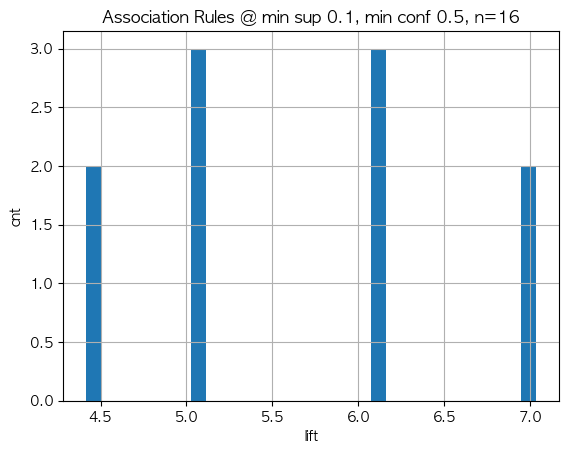

In [31]:
# lift 관찰
rules_conf_top10.hist('lift' , bins= 30)

plt.xlabel('lift')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

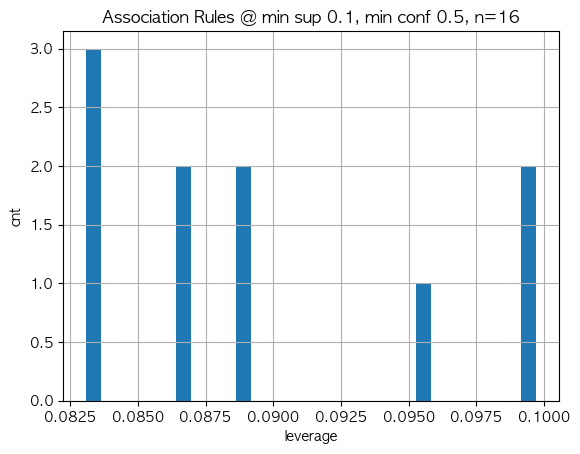

In [32]:
# leverage 관찰
rules_conf_top10.hist('leverage' , bins= 30)

plt.xlabel('leverage')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

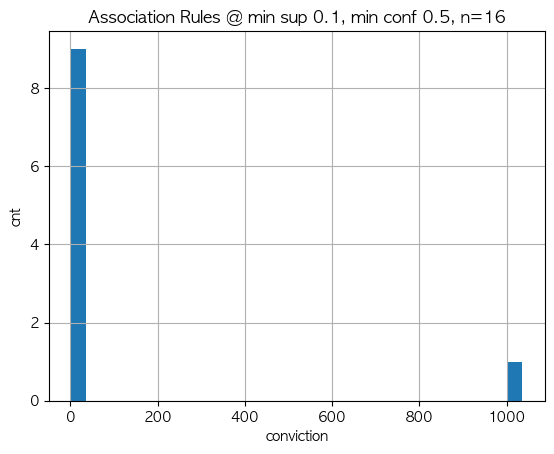

In [33]:
# conviction 관찰
rules_conf_top10.hist('conviction' , bins= 30)

plt.xlabel('conviction')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

#### [top10 분석]
- 지표별 수치 확인
> - support : 대부분 약 10% 확률로 발생
> - confidence : 57.5% 이상의 확률로 발생 (조건절이 발생할 때, 결과절이 발생할 확률이 대부분 높은 것으로 판단됨)
> - lift : 4.41~7.04 사이 값 (1 이상이기 때문에 독립적보다 종속적으로 발생할 가능성이 더 높은 것으로 판단됨)
> - leverage : 0.08~0.09 사이 값 (0 이상의 값이긴 하나 거의 근접함. **leverage의 경우 종속적으로 발생할 가능성과 독립적으로 발생할 가능성의 차이이기 때문에 절대적인 빈도수의 영향을 받음**. 이에 lift에 비해 낮은 값을 기록한 것으로 판단됨)
> - conviction : 2.09 이상의 값 (1 이상이기 때문에 우연의 확률이 어느 정도 배제된 것으로 해석 가능)
- "식품 섭취" 관련 규칙성만 보임
> - **[품목대분류]가공식품**의 데이터양이 다른 품목대분류에 비해 많기 때문으로 보임.
> - **"[원인]식품 섭취에 의한 위험 및 위해"이 조건절보다 결과절에 나오는 경우가 더 높은 confidence 값을 보임**, 규칙성이 "종속성"을 기준으로 본다는 것을 감안했을 때 당연한 결과로 보임. (특정 부위와 증상에 대한 내용이 있을 때, 특정 원인이 함께 일어나는 것이 일반적이니까)
> - leverage 값은 거의 비슷하지만, lift 값은 조금씩 차이가 보임. **lift를 기준으로 "[증상]소화기계통 장기손상 및 통증"만 따로 집합을 구성하는 경우가 종속성이 더 높다고 판단 가능**
- 행별 분석 생략, 결론 (전체 분석은 경향성을 보기 위함이므로 행별 분석 생략함)
> - "식품 섭취" 관련 규칙성만 보이기 때문에 전체에 대해서 올바른 해석을 하기 어려울 것이라 판단.
> - 이를 토대로, 각 품목에서 **소비자 인적사항과 연관된 위해 사례 규칙성 도출**을 하기 위해서는 **전체 분석이 아닌, 품목대분류별** 분석이 필요하다는 결론 도출 가능.


### 특이 규칙 분석

In [34]:
rules_conf_others = rules_conf

In [35]:
indices_to_remove = [0,1,2,3,4,5,6,7,8,9,10,11]
rules_conf_others = rules_conf_others.drop(indices_to_remove, errors='ignore').reset_index(drop=True)

In [36]:
rules_conf_others.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
2,(열상(찢어짐)),(남자),0.223261,0.500488,0.138821,0.621789,1.242364,0.027082,1.320722,0.251157,0.760610
0,(0-4),(남자),0.227265,0.500488,0.131700,0.579498,1.157865,0.017956,1.187894,0.176440,0.711198
1,(식품 섭취에 의한 위험 및 위해),(여자),0.180079,0.496745,0.102633,0.569930,1.147329,0.013179,1.170170,0.156613,0.672563
3,(미끄러짐·넘어짐),(남자),0.298483,0.500488,0.161230,0.540166,1.079278,0.011843,1.086287,0.104708,0.701396


#### [특이 규칙 분석]
- 각각 빈발집합에서 빈번히 발생하던 집합들로 묶여있음
> - lift, leverage를 살펴봤을 때, 발생 빈도 자체가 높기 때문에 연관 규칙 순위에 놓일 수 있었으나 종속적으로 발생한다는 것에 대한 근거가 부족하다는 사실 도출 가능.
> - conviction 값도 1에 가까운 값들을 가지고 있음. 우연의 일치를 완전히 배제하기 어렵다고 판단됨.
> - 위에서부터 주기적으로 보이는 "[범주형 나이]0-4"에 대한 해석이 필요할 것임 (품목대분류별 분석에서 보이길 바람)

- 최소 지지도: 0.08 / 최소 신뢰도: 0.5 / 연관규칙수는 88개

- 신뢰도 0.5~0.7 사이에 많은 규칙 존재

----

## 3. 최종 시각화

In [37]:
# top 10에 대해서

from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in rules_conf_top10.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")  # 얘 이름 바꾸면서 저장하깅

association_rules.html


In [38]:
# 전체에 대해서

from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in rules_conf.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color=get_color(row['confidence']), size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color=get_color(row['confidence']), size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules_전체데이터.html")  # 얘 이름 바꾸면서 저장하깅

association_rules_전체데이터.html
